# ECE 637 Deep Learning Lab Exercises


Name: Jack Girard 🦕 🐣 🐒

# Section 1

## Exercise 1.1

1.   Create two lists, `A` and `B`: `A` contains 3 arbitrary numbers and `B` contains 3 arbitrary strings.
2.   Concatenate two lists into a bigger list and name that list `C`. 
3.   Print the first element in `C`.
4.   Print the second last element in `C` via negative indexing.
5.   Remove the second element of `A` from `C`.
6.   Print `C` again.

In [5]:
#  ----------- YOUR CODE -----------
A = [6, 3, 7]
B = ["digital", "image", "processing"]
C = A + B
print("Entire List C: ", C)
print("First element in C = ", C[0])
print("Second to last element in C = ", C[-2])
del C[1]
print("Now C is: ", C)

Entire List C:  [6, 3, 7, 'digital', 'image', 'processing']
First element in C =  6
Second to last element in C =  image
Now C is:  [6, 7, 'digital', 'image', 'processing']


## Exercise 1.2
In this exercise, you will use a low-pass IIR filter to remove noise from a sine-wave signal.

You should organize your plots in a 3x1 subplot format.

1. Generate a discrete-time signal, `x`, by sampling a 2Hz continuous time sine wave signal with peak amplitude 1 from time 0s to 10s and at a sampling frequency of 500 Hz. Display the signal, `x`, from time 4s to 6s in the first row of a 3x1 subplot with the title "original signal".

2. Add Gaussian white random noise with 0 mean and standard deviation  0.1 to `x` and call it `x_n` . Display `x_n` from 4s to 6s on the second row of the subplot with the title "input signal".

3. Design a low-pass butterworth IIR filter of order 5 with a cut-off frequency of 4Hz, designed to filter out the noise.  Hint: Use the [signal.butter](https://docs.scipy.org/doc/scipy-1.1.0/reference/generated/scipy.signal.butter.html#scipy.signal.butter) function and note that the frequencies are relative to the Nyquist frequency. Apply the IIR filter to `x_n`, and name the output `y`. Hint: Use [signal.filtfilt](https://docs.scipy.org/doc/scipy-1.1.0/reference/generated/scipy.signal.filtfilt.html#scipy.signal.filtfilt) function. Plot `y` from 4s to 6s on the third row of the subplot with the title "filtered signal".


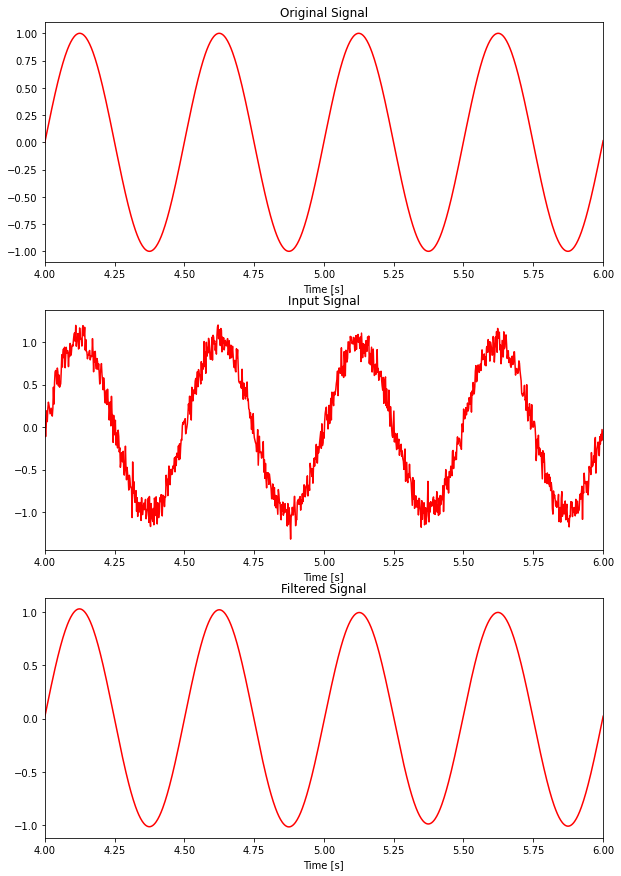

In [6]:
import numpy as np                     # import the numpy packages and use a shorter alising name
import matplotlib.pyplot as plt        # again import the matplotlib's pyplot packages
from scipy import signal               # import a minor package signal from scipy
plt.figure(figsize=(10, 15))           # fix the plot size

#  ----------- YOUR CODE -----------
# NOTE: All discrete signals plotted using continuous lines below

# Part 1
f = 2 # Hz
fs = 500 # sampling frequency
Ts = 1/fs # sampling period
t_start = 0 # seconds
t_finish = 10 # seconds
num_samples = fs*(t_finish - t_start)
t = np.linspace(t_start, t_finish, num_samples)
x = np.sin(2*np.pi*f*t)
plt.subplot(3, 1, 1)
plt.plot(t, x, 'r-')
plt.xlim([4, 6])
plt.title('Original Signal')
plt.xlabel('Time [s]')

# Part 2
mean = 0
std = 0.1
w = np.random.normal(mean, std, num_samples)
length = np.size(t);
x_n = np.zeros((1, length))
for i in range(length):
  x_n[0, i] = x[i] + w[i]
plt.subplot(3, 1, 2)
plt.plot(t, x_n[0,:], 'r-')
plt.xlim([4, 6])
plt.title('Input Signal')
plt.xlabel('Time [s]')

# Part 3
cutoff_frequency = 4
b, a = signal.butter(5, cutoff_frequency, btype='low', fs=fs)
y = signal.filtfilt(b, a, x_n[0,:], padlen=3)
plt.subplot(3, 1, 3)
plt.plot(t, y,'r-')
plt.xlim([4, 6])
plt.title('Filtered Signal')
plt.xlabel('Time [s]')

# plt.tight_layout()
plt.show()

# Section 2

## Exercise 2.1

*   Plot the third image in the test data set
*   Find the correspoding label for the this image and make it the title of the figure


Label for third testing image:  1


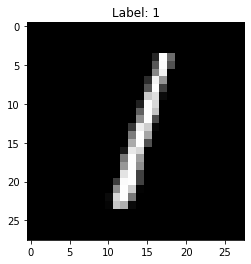

In [7]:
import keras
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

#  ----------- YOUR CODE -----------
third_testing_image = test_images[2,:,:,0]
plt.imshow(third_testing_image, cmap='gray')
third_testing_image_label = test_labels[2]
plt.title("Label: " + str(third_testing_image_label))
print("Label for third testing image: ", third_testing_image_label)

## Exercise 2.2
It is usually helpful to have an accuracy plot as well as a loss value plot to get an intuitive sense of how effectively the model is being trained. 

* Add code to this example for plotting two graphs with the following requirements:
  - Use a 1x2 subplot with the left subplot showing the loss function and right subplot showing the accuracy.
  - For each graph, plot the value with respect to epochs. Clearly label the x-axis, y-axis and the title.

(Hint: The value of of loss and accuracy are stored in the `hist` variable. 
Try to print out `hist.history` and `his.history.keys()`.)

In [8]:
import keras
from keras.datasets import mnist
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

network = models.Sequential()
network.add(layers.Flatten(input_shape=(28, 28, 1)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

train_images_nor = train_images.astype('float32') / 255
test_images_nor = test_images.astype('float32') / 255

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

hist = network.fit(train_images_nor, train_labels_cat, epochs=5, batch_size=128)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 4s 3ms/step - loss: 0.2560 - accuracy: 0.9265
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1029 - accuracy: 0.9700
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0689 - accuracy: 0.9795
Epoch 4/5
469/469

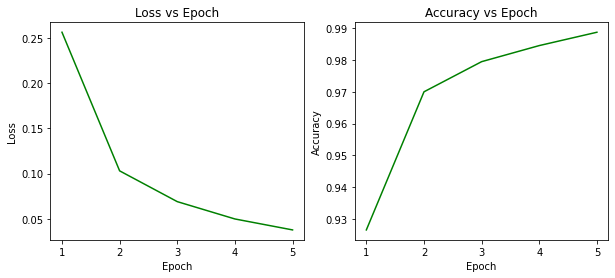

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

#  ----------- YOUR CODE -----------
epoch = [1, 2, 3, 4, 5]
plt.subplot(1, 2, 1)
plt.plot(epoch, hist.history['loss'], 'g-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')

plt.subplot(1, 2, 2)
plt.plot(epoch, hist.history['accuracy'], 'g-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')

# print(hist.history)
# print(hist.history.keys())

plt.show()

## Exercise 2.3
Use the dense network from Section 2 as the basis to construct of a deeper network with

*  5 dense hidden layers with dimensions [512, 256, 128, 64, 32] each of which uses a ReLU non-linearity

**Question:** Will the accuracy on the testing data always get better if we keep making the neural network larger?



*No*, the accuracy on the testing data will not always get better if we keep making the neural network larger. As the nerual network is made larger and number of epochs increases, the model will begin to overfit the training data. As a result, the model will not generalize and perform well on the testing data set. When the model's loss on the validation set stops decreasing, further accuracy improvements on the testing data cannot be achieved.

In [10]:
import keras
from keras import models
from keras import layers

#  ----------- YOUR CODE -----------
network = models.Sequential()
network.add(layers.Flatten(input_shape=(28, 28, 1)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)               

In [11]:
import keras
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))


network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

train_images_nor = train_images.astype('float32') / 255
test_images_nor = test_images.astype('float32') / 255

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

hist = network.fit(train_images_nor, train_labels_cat, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(test_images_nor, test_labels_cat)
print('test_accuracy:', test_acc)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2872 - accuracy: 0.9112
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1022 - accuracy: 0.9697
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0699 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0530 - accuracy: 0.9841
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0907 - accuracy: 0.9794
test_accuracy: 0.9793999791145325


# Section 3

## Exercise 3.1
In this exercise, you will access the relationship between the feature extraction layer and classification layer. The example above uses two sets of convolutional layers and pooling layers in the feature extraction layer and two dense layers in the classification layers. The overall performance is around 98% for both training and test dataset. In this exercise, try to create a similar CNN network with the following requirements:

*   Achieve the overall accuracy higher than 99% for training and testing dataset.
*  Keep the total number of parameters used in the network lower than 100,000.

In [12]:
import keras
from keras import models
from keras import layers

network = models.Sequential()

#  ----------- YOUR CODE -----------
network.add(layers.Conv2D(16, (3, 3), activation='relu', padding = 'same', input_shape=(28, 28, 1)))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'same'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
network.add(layers.MaxPooling2D((2, 2)))

network.add(layers.Flatten())
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)        

In [13]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images_nor = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images_nor = test_images.astype('float32') / 255

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# increased number of epochs from 5 to 6 and reduced batch size from 128 to 32
network.fit(train_images_nor, train_labels_cat, epochs=6, batch_size=32)

test_loss, test_acc = network.evaluate(test_images_nor, test_labels_cat)
print('test_accuracy:', test_acc)

Epoch 1/6
1875/1875 [==============================] - 15s 4ms/step - loss: 0.2173 - accuracy: 0.9326
Epoch 2/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0547 - accuracy: 0.9835
Epoch 3/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0387 - accuracy: 0.9883
Epoch 4/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0306 - accuracy: 0.9906
Epoch 5/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0252 - accuracy: 0.9923
Epoch 6/6
313/313 [==============================] - 1s 3ms/step - loss: 0.0313 - accuracy: 0.9906
test_accuracy: 0.9905999898910522


# Section 4

## Exercise 4.1
In this exercise you will need to create the entire neural network that does image denoising tasks. Try to mimic the code provided above and follow the structure as provided in the instructions below.

**Task 1**: Create the datasets
1.   Import necessary packages
2.   Load the MNIST data from Keras, and save the training dataset images as `train_images`, save the test dataset images as `test_images`
3.   Add additive white gaussian noise to the train images as well as the test images and save the noisy images to `train_images_noisy` and `test_images_noisy` respectivly. The noise should have mean value 0, and standard deviation 0.4. (Hint: Use [np.random.normal](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html))
4.   Show the first image in the training dataset as well as the test dataset (plot the images in 1 x 2 subplot form)

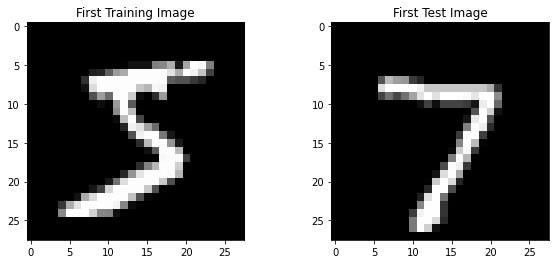

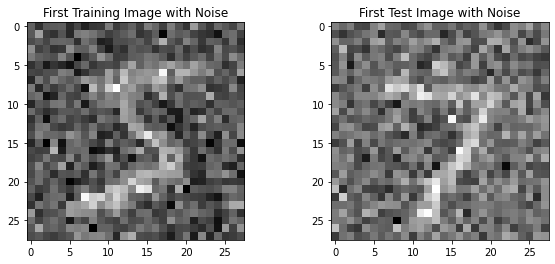

In [14]:
#  ----------- YOUR CODE -----------
import keras
from keras.datasets import mnist
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images_nor = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images_nor = test_images.astype('float32') / 255

train_noise = np.random.normal(0, 0.4, train_images.shape)
test_noise = np.random.normal(0, 0.4, test_images.shape)

train_images_noisy = train_images_nor + train_noise
test_images_noisy = test_images_nor + test_noise

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

first_train_image = train_images[0,:,:,0]
first_test_image = test_images[0,:,:,0]

first_noisy_train_image = train_images_noisy[0,:,:,0]
first_noisy_test_image = test_images_noisy[0,:,:,0]

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(first_train_image, cmap='gray')
plt.title('First Training Image')

plt.subplot(1, 2, 2)
plt.imshow(first_test_image, cmap='gray')
plt.title('First Test Image')

plt.show()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(first_noisy_train_image, cmap='gray')
plt.title('First Training Image with Noise')

plt.subplot(1, 2, 2)
plt.imshow(first_noisy_test_image, cmap='gray')
plt.title('First Test Image with Noise')

plt.show()


**Task 2**: Create the neural network model
1.   Create a sequential model called `encoder` with the following layers sequentially:
  * convolutional layer with `32` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function.
  * max pooling layer with `2x2` kernel size
  * convolutional layer with `16` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function.
  * max pooling layer with `2x2` kernel size
  * convolutional layer with `8` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function and name the layer as `'convOutput'`.
  * flatten layer
  * dense layer with output dimension as `encoding_dim`  with `'relu'` activition function.
2.   Create a sequential model called `decoder` with the following layers sequentially:
  * dense layer with the input dimension as `encoding_dim` and the output dimension as the product of the output dimenstions of the `'convOutput'` layer.
  * reshape layer that convert the tensor into the same shape as `'convOutput'`
  * convolutional layer with `8` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function.
  * upsampling layer with `2x2` kernel size
  * convolutional layer with `16` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function.
  * upsampling layer with `2x2` kernel size
  * convolutional layer with `32` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function
  * convolutional layer with `1` output channels, `3x3` kernel size, and the padding convention `'same'` with `'sigmoid'` activition function
3. Create a sequential model called `autoencoder` with the following layers sequentially:
  * `encoder` model
  * `decoder` model
 

In [15]:
#  ----------- YOUR CODE -----------
encoding_dim = 32

# 1
encoder = models.Sequential()
encoder.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'same', input_shape=(28, 28, 1)))
encoder.add(layers.MaxPooling2D((2, 2)))
encoder.add(layers.Conv2D(16, (3, 3), activation='relu', padding = 'same'))
encoder.add(layers.MaxPooling2D((2, 2)))
encoder.add(layers.Conv2D(8, (3, 3), activation='relu', padding = 'same', name = 'convOutput'))
encoder.add(layers.Flatten())
encoder.add(layers.Dense(encoding_dim, activation='relu'))

# 2
convOutputShape = encoder.get_layer('convOutput').output_shape[1:]
denseOutputShape = convOutputShape[0]*convOutputShape[1]*convOutputShape[2]

decoder = models.Sequential()
# assigning new variable as tuple of 'encoding_dim', to use for the following dense layer
encodingDim = encoding_dim,
decoder.add(layers.Dense(denseOutputShape, input_shape=(encodingDim)))
decoder.add(layers.Reshape(convOutputShape))
decoder.add(layers.Conv2D(8, (3, 3), activation='relu', padding = 'same'))
decoder.add(layers.UpSampling2D((2, 2)))
decoder.add(layers.Conv2D(16, (3, 3), activation='relu', padding = 'same'))
decoder.add(layers.UpSampling2D((2, 2)))
decoder.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'same'))
decoder.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding = 'same'))

# 3
autoencoder = models.Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

In [16]:
encoder.summary()
decoder.summary()
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 convOutput (Conv2D)         (None, 7, 7, 8)           1160      
                                                                 
 flatten_3 (Flatten)         (None, 392)              

**Task 3**: Create the neural network model  

Fit the model to the training data using the following hyper-parameters:
  * `adam` optimizer
  * `binary_crossentropy` loss function
  * `20` training epochs
  * batch size as `256`
  * set `shuffle` as `True`
  
Compile the model and fit ...

Epoch 1/20
235/235 [==============================] - 5s 14ms/step - loss: 0.2572
Epoch 2/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1518
Epoch 3/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1348
Epoch 4/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1266
Epoch 5/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1218
Epoch 6/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1185
Epoch 7/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1162
Epoch 8/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1143
Epoch 9/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1128
Epoch 10/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1116
Epoch 11/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1105
Epoch 12/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1096
Epoch 13/20
2

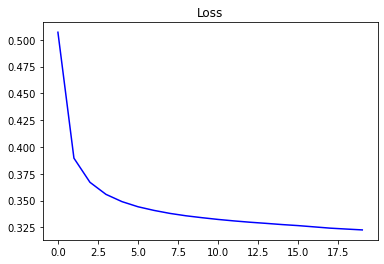

313/313 [==============================] - 1s 3ms/step - loss: 0.0996
test_acc: 0.09961964935064316


In [17]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(train_images_noisy, train_images_nor, 
                epochs=20, 
                batch_size=256,
                shuffle=True)

plt.plot(np.sqrt(history.history['loss']), 'b-')
plt.title('Loss')
plt.show()

test_loss = autoencoder.evaluate(test_images_nor, test_images_nor)
print('test_acc:', test_loss) 

**Task 4**: Create the neural network model (No need to write code, just run the following commands)

In [18]:
def showImages(input_imgs, encoded_imgs, output_imgs, size=1.5, groundTruth=None):

  numCols = 3 if groundTruth is None else 4
  
  num_images = input_imgs.shape[0]
      
  encoded_imgs = encoded_imgs.reshape((num_images, 1, -1))
    

  plt.figure(figsize=((numCols+encoded_imgs.shape[2]/input_imgs.shape[2])*size, num_images*size))

  pltIdx = 0
  col = 0
  for i in range(0, num_images):

    col += 1
    # plot input image
    pltIdx += 1
    ax = plt.subplot(num_images, numCols, pltIdx)
    plt.imshow(input_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if col == 1:
      plt.title('Input Image')

    # plot encoding
    pltIdx += 1
    ax = plt.subplot(num_images, numCols, pltIdx)
    plt.imshow(encoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if col == 1:
      plt.title('Encoded Image')

    # plot reconstructed image
    pltIdx += 1
    ax = plt.subplot(num_images, numCols, pltIdx)
    plt.imshow(output_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if col == 1:
      plt.title('Reconstructed Image')
  
    if numCols == 4:
      # plot ground truth image
      pltIdx += 1
      ax = plt.subplot(num_images, numCols, pltIdx)
      plt.imshow(groundTruth[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      
      if col == 1:
        plt.title('Ground Truth')

  plt.show()

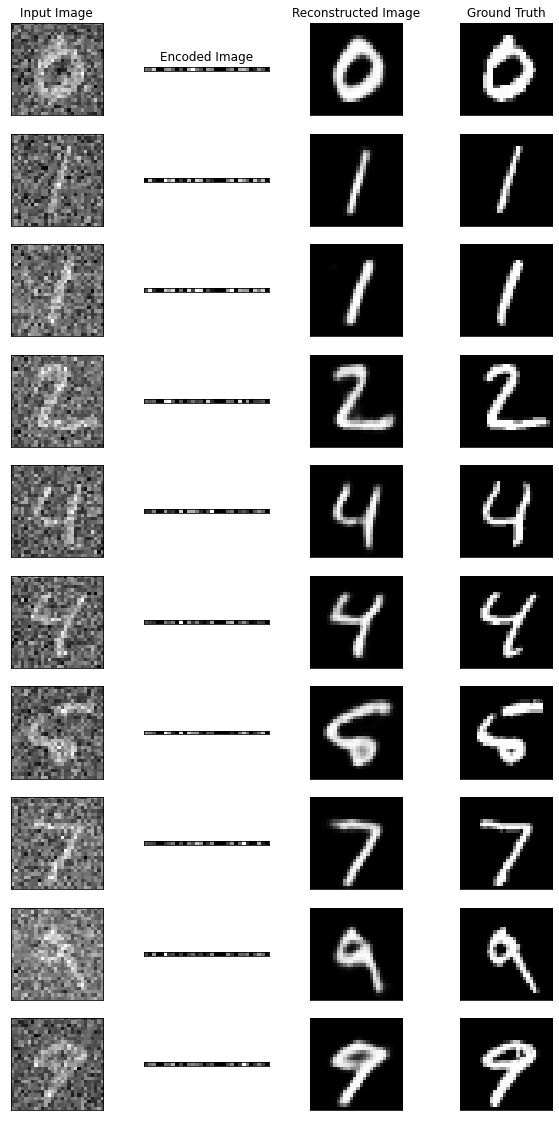

In [19]:
num_images = 10

input_labels = test_labels[0:num_images]
I = np.argsort(input_labels)

input_imgs = test_images_noisy[I]

encoded_imgs = encoder.predict(test_images_noisy[I])
output_imgs = decoder.predict(encoded_imgs)

showImages(input_imgs, encoded_imgs, output_imgs, size=2, groundTruth=test_images_nor[I])